In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [170]:
housing = pd.read_csv('housing.csv')
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [171]:
housing.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [172]:
housing['total_bedrooms'].isnull().unique()

array([False,  True])

In [173]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [174]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66fa7dda58>,
      dtype=object)

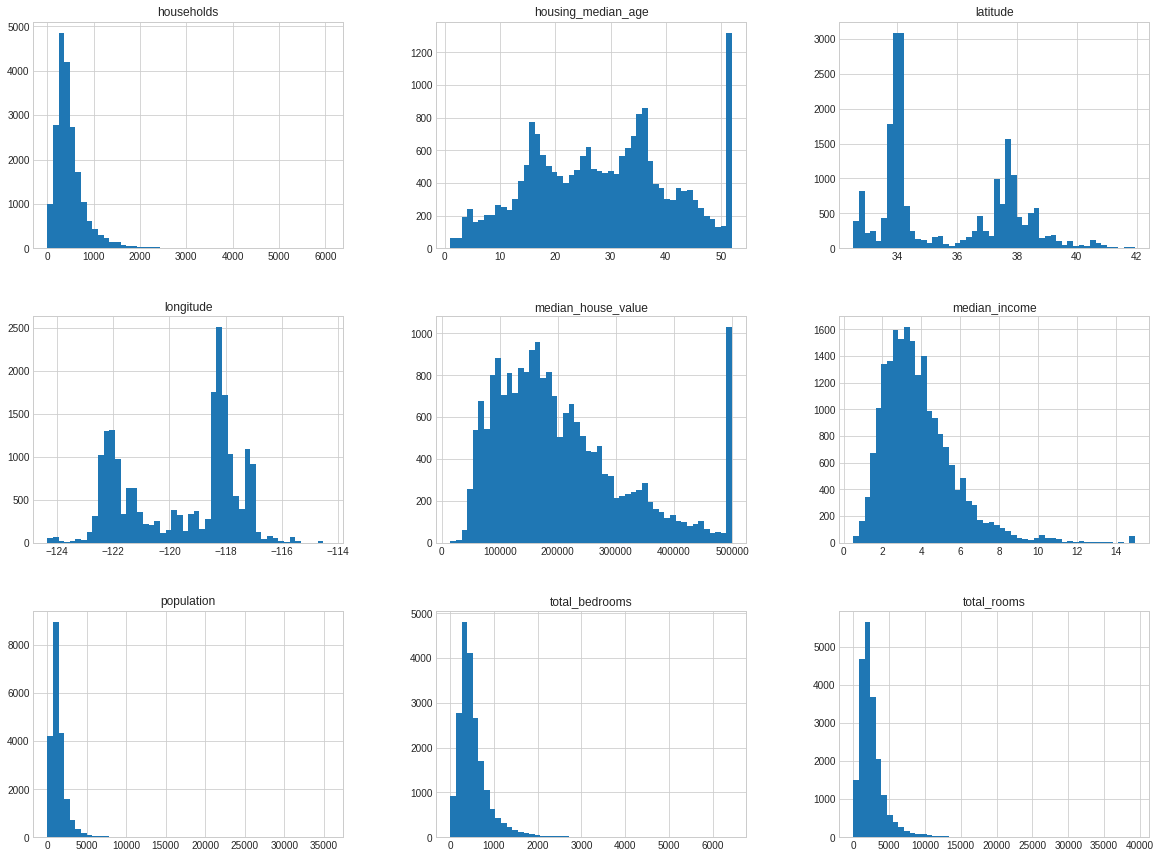

In [175]:
housing.hist(bins=50, figsize=(20, 15))

In [176]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


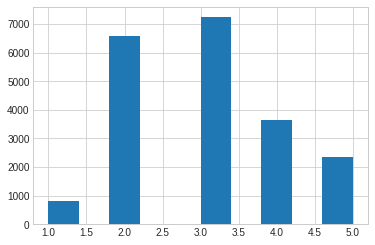

In [177]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)
housing['income_cat'].hist()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

In [0]:
split = StratifiedShuffleSplit(test_size=0.2, train_size=0.8, random_state=42)

In [0]:
for train_index, test_index in split.split(housing, housing['income_cat']):
  train_set = housing.loc[train_index]
  test_set = housing.loc[test_index]

In [0]:
for set_ in (train_set, test_set):
  set_.drop('income_cat', axis=1, inplace=True)

In [0]:
# Set the a copy of the train_set to housing variable
housing = train_set.copy()

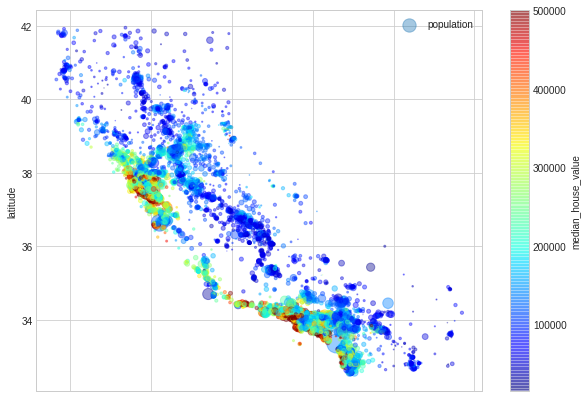

In [183]:
housing.plot(kind='scatter', 
             x='longitude', 
             y='latitude', 
             alpha=0.4, 
             label='population',
             s=housing['population'] / 100, 
             c='median_house_value',
             cmap=plt.get_cmap('jet'), 
             colorbar=True, figsize=(10, 7))
plt.legend()

In [184]:
matrix_corr = housing.corr()
matrix_corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687691
total_rooms           0.133371
housing_median_age    0.108680
households            0.064481
total_bedrooms        0.047338
population           -0.026199
longitude            -0.046952
latitude             -0.144846
Name: median_house_value, dtype: float64

In [0]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66f9eee550>,
      dtype=object)

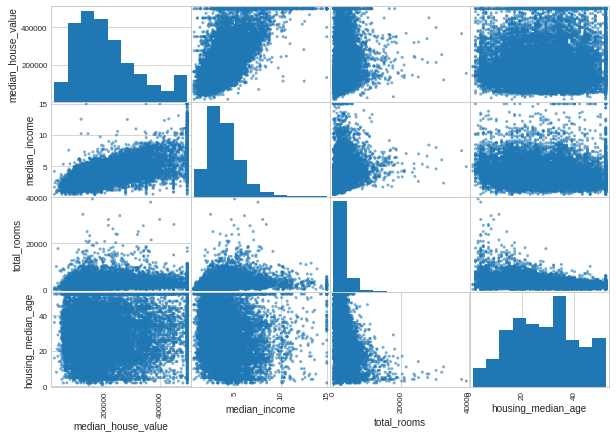

In [186]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], alpha=0.6, figsize=(10, 7))

Best correletions = median_house_value - median_income



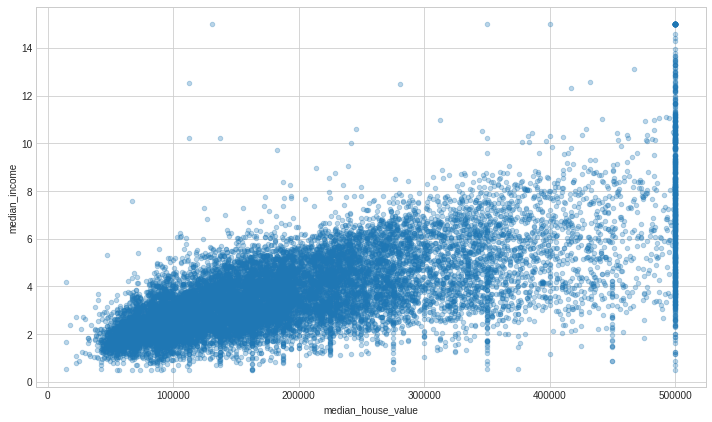

In [187]:
housing.plot(kind='scatter', alpha=0.3, x='median_house_value', y='median_income', figsize=(12, 7))

In [188]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [0]:
housing['bedroom_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['population_per_household'] = housing['population'] / housing['households']

In [190]:
matrix_corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687691
total_rooms           0.133371
housing_median_age    0.108680
households            0.064481
total_bedrooms        0.047338
population           -0.026199
longitude            -0.046952
latitude             -0.144846
Name: median_house_value, dtype: float64

In [191]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687691
rooms_per_household         0.145258
total_rooms                 0.133371
housing_median_age          0.108680
households                  0.064481
total_bedrooms              0.047338
population_per_household   -0.024885
population                 -0.026199
longitude                  -0.046952
latitude                   -0.144846
bedroom_per_room           -0.255939
Name: median_house_value, dtype: float64

In [0]:
# Prepare train data set > drop the labels
housing_labels = housing['median_house_value'].copy()
housing = housing.drop('median_house_value', axis=1)

In [0]:
# Impute missing values
from sklearn.impute import SimpleImputer
housing_num = housing.drop('ocean_proximity', axis=1)

In [194]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_mean.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [195]:
X = imputer_mean.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedroom_per_room,rooms_per_household,population_per_household
0,-122.19,37.48,38.0,1300.0,269.00000,608.0,292.0,4.5568,0.206923,4.452055,2.082192
1,-118.16,33.97,39.0,1444.0,447.00000,1890.0,416.0,2.1181,0.309557,3.471154,4.543269
2,-117.92,34.10,35.0,2994.0,603.00000,1933.0,561.0,4.0052,0.201403,5.336898,3.445633
3,-117.20,34.26,17.0,9419.0,1455.00000,1382.0,459.0,6.2233,0.154475,20.520697,3.010893
4,-117.30,34.05,6.0,2155.0,538.12643,1039.0,391.0,1.6675,0.213019,5.511509,2.657289


In [0]:
housing_cat = housing[['ocean_proximity']]


In [0]:
from sklearn.preprocessing import OneHotEncoder

In [197]:
cat_encoder = OneHotEncoder()
housing_hot_cat = cat_encoder.fit_transform(housing_cat)
housing_hot_cat

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [198]:
housing_hot_cat.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [199]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedroom_per_room',
 'rooms_per_household',
 'population_per_household']

In [200]:
len(list(housing))

12

In [201]:
len(list(housing_tr))

11

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [0]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler()),
                        ])

In [204]:
housing_training_set = num_pipeline.fit_transform(housing_num)
housing_training_set

array([[-1.31588226,  0.87005565,  0.75780567, ..., -0.10580128,
        -0.37817569, -0.09644125],
       [ 0.69547351, -0.77149164,  0.83746296, ...,  1.67553784,
        -0.7525397 ,  0.15219008],
       [ 0.81525648, -0.71069359,  0.51883377, ..., -0.20161264,
        -0.04047228,  0.04130092],
       ...,
       [ 1.12469583, -0.70134005,  1.15609216, ...,  0.75267476,
        -0.27023312,  0.03904028],
       [-1.44065619,  1.01971238,  1.87300785, ...,  1.32333779,
        -0.58337457, -0.13186826],
       [ 0.71543734, -0.79955228,  0.51883377, ..., -0.28194811,
        -0.16905064,  0.00361318]])

In [0]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),
                                   ('cat', OneHotEncoder(), cat_attribs)])

In [206]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.31588226,  0.87005565,  0.75780567, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.69547351, -0.77149164,  0.83746296, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81525648, -0.71069359,  0.51883377, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12469583, -0.70134005,  1.15609216, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44065619,  1.01971238,  1.87300785, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.71543734, -0.79955228,  0.51883377, ...,  0.        ,
         0.        ,  0.        ]])

In [207]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [209]:
print(f"Predictions: {lin_reg.predict(some_data_prepared)}")
print(f"Labels: {list(some_labels)}")

Predictions: [277592.71689538 151522.97850333 209516.50892847 287158.17312931
  48772.28536223]
Labels: [286900.0, 176600.0, 160700.0, 230900.0, 95800.0]


In [0]:
some_data_predictions = lin_reg.predict(some_data_prepared)

In [0]:
from sklearn.metrics import mean_squared_error

In [212]:
mse = mean_squared_error(some_labels, some_data_predictions)
rmse = np.sqrt(mse)
rmse

41170.67416935618

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [0]:
tree_reg = DecisionTreeRegressor()

In [0]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

In [216]:
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores)
print(tree_rmse_scores.mean())
print(tree_rmse_scores.std())

[75360.40082906 70880.69747473 75420.28938261 67609.69589278
 73803.09268453 72664.36797459 69155.0815572  69841.2440311
 69859.57620522 70584.02698697]
71517.84730187939
2534.2904165787086


In [0]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)

In [218]:
lin_rmse_scores = np.sqrt(-lin_scores)
print(lin_rmse_scores)
print(lin_rmse_scores.mean())
print(lin_rmse_scores.std())

[72491.28888873 69247.26748425 68871.0695327  65669.14724591
 68312.40819333 67759.46795746 68340.46148276 65225.41408291
 66383.7579553  68199.80778186]
68050.00906052015
1962.5452036070092


In [0]:
from sklearn.ensemble import RandomForestRegressor

In [220]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [221]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [222]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [223]:
cvres = grid_search.cv_results_
for mean_score, param in zip(cvres['mean_test_score'], cvres['params']):
  print(f"{np.sqrt(-mean_score)}: {param}")

64971.846547979956: {'max_features': 2, 'n_estimators': 3}
55252.12745439028: {'max_features': 2, 'n_estimators': 10}
52621.0091697637: {'max_features': 2, 'n_estimators': 30}
59285.173988174756: {'max_features': 4, 'n_estimators': 3}
52708.18569954596: {'max_features': 4, 'n_estimators': 10}
50376.57284583962: {'max_features': 4, 'n_estimators': 30}
59494.69083174784: {'max_features': 6, 'n_estimators': 3}
51771.388402540084: {'max_features': 6, 'n_estimators': 10}
50077.13308041248: {'max_features': 6, 'n_estimators': 30}
58741.61105206169: {'max_features': 8, 'n_estimators': 3}
52334.72512906227: {'max_features': 8, 'n_estimators': 10}
50238.42457512415: {'max_features': 8, 'n_estimators': 30}
62520.78285111656: {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54207.113601646604: {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59621.69298491228: {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52734.58092558358: {'bootstrap': False, 'max_features': 3,

In [224]:
features_importances = grid_search.best_estimator_.feature_importances_
features_importances

array([7.33103987e-02, 6.75986018e-02, 4.35095771e-02, 1.75921314e-02,
       1.59999328e-02, 1.74748342e-02, 1.63175431e-02, 3.44245794e-01,
       7.36185121e-02, 5.65373562e-02, 1.06016066e-01, 9.48622932e-03,
       1.50190570e-01, 1.34560448e-04, 3.00194737e-03, 4.96594590e-03])

In [225]:
attributes = num_attribs + list(cat_encoder.categories_[0])
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedroom_per_room',
 'rooms_per_household',
 'population_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [226]:
sorted(zip(features_importances, attributes), reverse=True)

[(0.34424579352351325, 'median_income'),
 (0.15019056980810916, 'INLAND'),
 (0.10601606631692066, 'population_per_household'),
 (0.07361851207310989, 'bedroom_per_room'),
 (0.07331039866181015, 'longitude'),
 (0.067598601831487, 'latitude'),
 (0.05653735615634563, 'rooms_per_household'),
 (0.043509577146241284, 'housing_median_age'),
 (0.017592131391506467, 'total_rooms'),
 (0.01747483418770143, 'population'),
 (0.01631754310147218, 'households'),
 (0.0159999327659281, 'total_bedrooms'),
 (0.009486229319909232, '<1H OCEAN'),
 (0.004965945900719668, 'NEAR OCEAN'),
 (0.003001947367334812, 'NEAR BAY'),
 (0.00013456044789108776, 'ISLAND')]

**test_set # variable for the test data set DataFrame!**

In [227]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
final_model_estimator = grid_search.best_estimator_

X_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value'].copy()

X_test['bedroom_per_room'] = X_test['total_bedrooms'] / X_test['total_rooms']
X_test['rooms_per_household'] = X_test['total_rooms'] / X_test['households']
X_test['population_per_household'] = X_test['population'] / X_test['households']

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model_estimator.predict(X_test_prepared)

In [235]:
final_predictions

array([ 93550.        , 354753.43333333, 130263.33333333, ...,
        59246.66666667, 120746.66666667, 253933.36666667])

In [237]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49148.12835126038

In [239]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([47112.74235579, 51102.51019843])